# **Identificação**:

- `Número de aluno`: 222203209
- `Nome`: Francisco Gomes
- `Data`:03/06/2025

# **Instruções:**
- Justifique suas respostas quando solicitado.
- Não é permitido a consulta a outros alunos ou a qualquer material externo.
- Eletronic devices estão proibidos durante o teste.
- Teste seus códigos com diferentes entradas para garantir seu funcionamento.
- Salve o notebook com seu `número de aluno` antes de entregar. Exemplo: `2022000000.ipynb`.
- Faça silêncio em respeito aos alunos que ainda estão realizando o teste.

## Importando bibliotecas

In [1]:
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.3 umap umap-learn

In [2]:
!pip install nltk
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install scikit-learn

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.6 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
jax 0.5.2 requires scipy>=1

In [3]:
!pip install pandas networkx matplotlib

In [4]:
!pip install pyLDAvis

In [5]:
# Instalar o Graphviz e PyGraphviz
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [6]:
import numpy as np
import networkx as nx

# **Questões:**

## 1. Considerando o grafo abaixo:

In [7]:
# graph
g = {'S': {('A',7),('B',2),('C',3)},
    'A': {('B',3),('D',4),('S',7)},
    'B': {('A',3),('D',4),('H',1),('S',2)},
    'C': {('L',2),('S',3)},
    'D': {('A',4),('B',4),('F',5)},
    'E': {('K',5),('G',2)},
    'F': {('D',5),('H',4)},
    'G': {('H',2),('E',2)},
    'H': {('B',1),('F',4),('G',2)},
    'I':{('L',4),('J',6),('K',4)},
    'J':{('L',4),('I',6),('K',4)},
    'K':{('I',4),('J',4),('E',5)},
    'L':{('C',2),('J',4),('I',4)}
}

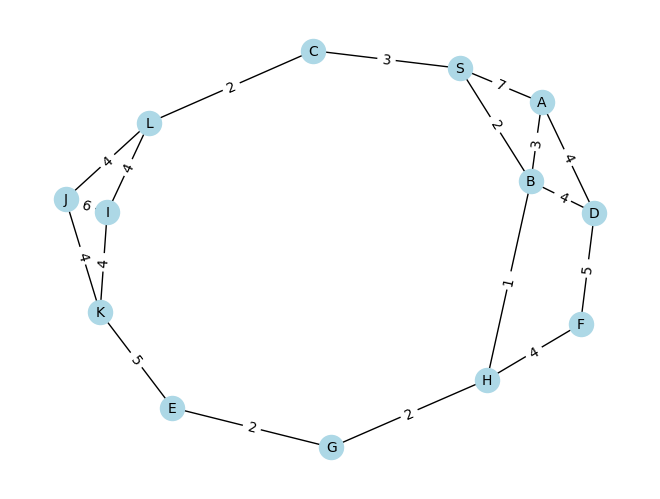

In [8]:
import matplotlib.pyplot as plt

def show_weighted_graph(graph):
    """
    Function to visualize the graph using NetworkX and Matplotlib.
    Enters a graph represented as an adjacency list and displays it.
    The graph is displayed with nodes, edges, and weights.

    Expected format for the graph:
    {
        'Node1': {('Node2', weight), ('Node3', weight)},
        'Node2': {('Node1', weight), ('Node4', weight)},
        ...
        'NodeN': {('NodeM', weight), ...}
    }

        Args:
            graph (dict): The graph represented as an adjacency list.
    """

    G = nx.Graph()
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

show_weighted_graph(g)

## 1.2. Qual ou quais dos algoritmos abaixo eu poderia utilizar para encontrar o caminho com menor custo no grafo acima?

- a) [ ] Breadth-First Search (BFS)
- b) [ ] Depth-First Search (DFS)
- c) [ ] Dijkstra
- d) [ ] Minimax

In [9]:
# sua resposta
#A opção C

## 1.3. Explique sua escolha(s) na questão anterior:

In [10]:
#O Dijkstra é um algoritmo para encontrar o caminho com menor custo num grafo ponderado, desde que os pesos sejam positivos.

## 1.4. Partindo do nó inicial "S" (`start_node = 'S'`) e tendo como objetivo chegar ao nó "E" (`goal_node = 'E'`), qual o caminho e menor custo possível?

In [11]:
# start node
start_node = 'S'

# goal node
goal_node = 'E'

In [12]:
# sua resposta
import networkx as nx


G = nx.Graph()

for origem, destinos in g.items():
    for destino, peso in destinos:
        G.add_edge(origem, destino, weight=peso)

caminho_mais_curto = nx.dijkstra_path(G, start_node, goal_node)
custo_total = nx.dijkstra_path_length(G, start_node, goal_node)

# Exibir os resultados
print(f"Caminho mais curto de '{start_node}' até '{goal_node}': {caminho_mais_curto}")
print(f"Custo total: {custo_total}")


Caminho mais curto de 'S' até 'E': ['S', 'B', 'H', 'G', 'E']
Custo total: 7


## 2. Considerando o grafo abaixo, escolha um dos algoritmos da lista abaixo e encontre o nó desejado:

- Breadth-First Search (BFS)
- Depth-First Search (DFS)
- Dijkstra
- Minimax

**A solução deve conter o caminho utilizado**
- Exemplo:
    - para `nó inicial A` e `nó objetivo H`:
    - Caminho: ACDBFGDGH



In [13]:
grafo = {
    'A': {'B': 1, 'C': 1},
    'B': {'A': 1, 'D': 1, 'E': 1},
    'C': {'A': 1, 'F': 1, 'G': 1},
    'D': {'B': 1},
    'E': {'B': 1, 'H': 1},
    'F': {'C': 1},
    'G': {'C': 1, 'H': 1},
    'H': {'E': 1, 'G': 1}
}


**A funçao abaixo pode auxiliar na visualização de seu grafo...**

In [14]:
def show_graph(graph):
    """
    Function to visualize the graph using NetworkX and Matplotlib.
    Enters a graph represented as an adjacency list and displays it.
    The graph is displayed with nodes and edges.

    Args:
        graph (dict): The graph represented as an adjacency list.
    """
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10)
    plt.show()


## 2.1. `Nó inicial A` e `nó objetivo H`

In [15]:
def dfs_completo(grafo, inicio, objetivo):
    pilha = [(inicio, [inicio])]
    visitados = []
    caminho_ate_objetivo = None

    while pilha:
        (no_atual, caminho) = pilha.pop()
        if no_atual not in visitados:
            visitados.append(no_atual)
            if no_atual == objetivo and caminho_ate_objetivo is None:
                caminho_ate_objetivo = caminho
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    pilha.append((vizinho, caminho + [vizinho]))

    return caminho_ate_objetivo, visitados

# Definir início e objetivo
start_node = 'A'
goal_node = 'H'

# Executar DFS
caminho_encontrado, ordem_visita = dfs_completo(grafo, start_node, goal_node)

# Exibir o resultado
print(f"Caminho encontrado de '{start_node}' até '{goal_node}' usando DFS: {' -> '.join(caminho_encontrado)}")
print(f"Ordem completa de visitação: {', '.join(ordem_visita)}")

Caminho encontrado de 'A' até 'H' usando DFS: A -> C -> G -> H
Ordem completa de visitação: A, C, G, H, E, B, D, F


## 2.2. `Nó inicial A` e `nó objetivo F`

In [16]:
# sua resposta
start_node = 'A'
goal_node = 'F'

# Executar DFS
caminho_encontrado, ordem_visita = dfs_completo(grafo, start_node, goal_node)

# Exibir o resultado
print(f"Caminho encontrado de '{start_node}' até '{goal_node}' usando DFS: {' -> '.join(caminho_encontrado)}")
print(f"Ordem completa de visitação: {', '.join(ordem_visita)}")

Caminho encontrado de 'A' até 'F' usando DFS: A -> C -> F
Ordem completa de visitação: A, C, G, H, E, B, D, F


## 2.3. Qual estrutura de dados o algoritmo que você escolheu tipicamente usa?

- a) [ ] Queue
- b) [ ] Heap
- c) [ ] Stack
- d) [X] Nenhuma das anteriores
- e) [ ] Todas as anteriores

## 2.4. Quando usamos o algoritmo de busca em profundidade (DFS), uma vez que tenhamos percorrido todo um caminho na árvore (galho) e não encontramos o nó desejado, o que acontece?

In [17]:
# Quando percorremos um galho todo e não encontramos o nó desejado, o DFS faz
#backtracking e continua a explorar outros caminhos possíveis até encontrar o nó ou terminar a árvore.

## 2.5. Qual algoritmo de busca da lista abaixo garante que se encontra o menor caminho?

- a) [X] Breadth-First Search (BFS)
- b) [ ] Depth-First Search (DFS)

In [18]:
# a) [X] Breadth-First Search (BFS)

# 3. Considerando que o grafo abaixo representa os estados possíveis após turnos alternados entre o Jogador 1 (Player 1 - P1) e o Jogador 2 (Player 2 - P2):

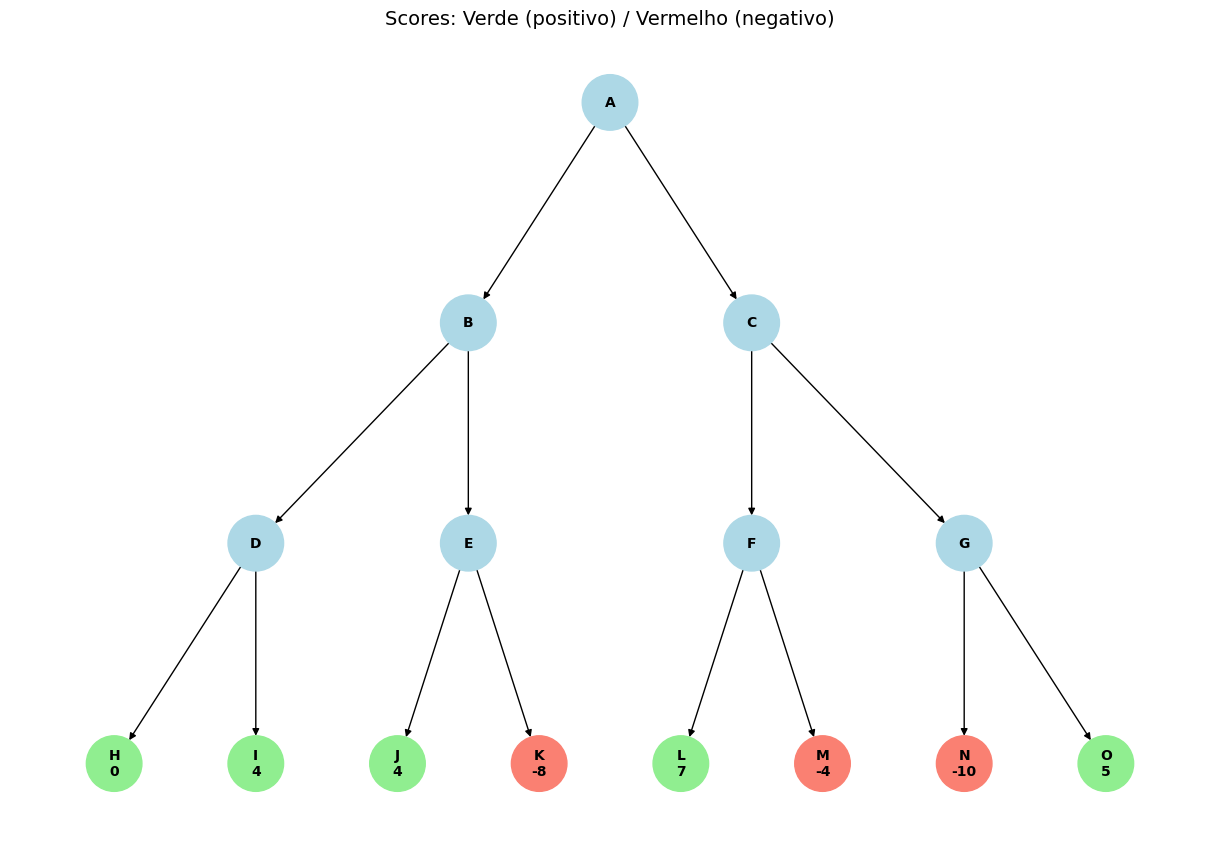

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

edges = [
    (0, 1), (0, 2),
    (1, 3), (1, 4),
    (2, 5), (2, 6),
    (3, 7), (3, 8),
    (4, 9), (4, 10),
    (5, 11), (5, 12),
    (6, 13), (6, 14),
]

# scores das folhas
values = {
    7: 0, 8: 4, 9: 4, 10: -8, 11: 7, 12: -4, 13: -10, 14: 5
}

# adicionando labels A (0) até O (14)
labels = {i: chr(65 + i) for i in range(15)}

# criar grafo
G = nx.DiGraph()
G.add_edges_from(edges)

# atribuir valores
for node in G.nodes:
    G.nodes[node]["value"] = values.get(node, None)

leaf_nodes = [n for n in G.nodes if G.out_degree(n) == 0]

# adicionando cores condicionais
colors = []
for n in G.nodes:
    if n in leaf_nodes:
        val = G.nodes[n]["value"]
        if val is not None and val >= 0:
            colors.append('lightgreen')
        elif val is not None and val < 0:
            colors.append('salmon')
        else:
            colors.append('lightgray')
    else:
        colors.append('lightblue')

# labels com score nas folhas
display_labels = {}
for n in G.nodes:
    if n in leaf_nodes and G.nodes[n]["value"] is not None:
        display_labels[n] = f"{labels[n]}\n{G.nodes[n]['value']}"
    else:
        display_labels[n] = labels[n]

# layout top-down da árvore
pos = graphviz_layout(G, prog="dot")

# plot
plt.figure(figsize=(12, 8))
nx.draw(G, pos,
        with_labels=True,
        labels=display_labels,
        node_color=colors,
        node_size=1600,
        font_weight="bold",
        font_size=10,
        arrows=True)

plt.title("Scores: Verde (positivo) / Vermelho (negativo)", fontsize=14)
plt.axis("off")
plt.show()


## 3.1. Implemente o Minimax (Busca Adversarial) e responda qual o melhor score possível para o Jogador 1 considerando que este é o primeiro a jogar.

In [20]:
# Função Minimax com registo do caminho ótimo
def minimax_caminho(node, is_maximizing):
    # Se for folha, devolve valor e o caminho até ela
    if node in values:
        return values[node], [node]

    children = list(G.successors(node))

    if is_maximizing:
        max_val = float('-inf')
        best_path = []
        for child in children:
            val, path = minimax_caminho(child, False)
            if val > max_val:
                max_val = val
                best_path = [node] + path
        return max_val, best_path
    else:
        min_val = float('inf')
        best_path = []
        for child in children:
            val, path = minimax_caminho(child, True)
            if val < min_val:
                min_val = val
                best_path = [node] + path
        return min_val, best_path

# Jogador 1 começa no nó 0
melhor_score, caminho_otimo = minimax_caminho(0, True)
# Converte índices para letras para mostrar o caminho
caminho_letras = [labels[n] for n in caminho_otimo]

print(f"O melhor score possível para o Jogador 1 (P1) é: {melhor_score}")
print(f"Caminho ótimo escolhido por P1: {' -> '.join(caminho_letras)}")


O melhor score possível para o Jogador 1 (P1) é: 5
Caminho ótimo escolhido por P1: A -> C -> G -> O


# 4. Considerando o dataset fornecido:

In [21]:
!pip install numpy==1.24.4 scipy==1.10.1

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you ha

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = list(set(stopwords.words('portuguese')))
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import pandas as pd

df_train = pd.read_csv("sinopsys_train.csv")
df_test = pd.read_csv("sinopsys_test.csv")

df_train.head()

,titulo,sinopse,generos,is_valid
0,We Were Soldiers,A história da primeira grande batalha da fase ...,"['Ação', 'História', 'Guerra']",False
1,4Got10,"Um negócio de drogas dá errado, deixando corpo...","['Ação', 'Crime', 'Thriller']",False
2,Pontypool,Quando o disc jockey Grant Mazzy se reporta à ...,"['Horror', 'Mistério', 'Ficção Científica']",False
3,Ticker,Depois que o parceiro de um detetive de São Fr...,"['Ação', 'Crime', 'Thriller']",False
4,Real Genius,Um adolescente prodígio tenso entra em uma fac...,"['Comédia', 'Romance', 'Ficção Científica']",True


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Define o corpus a partir da coluna desejada
corpus = df_train["sinopse"].dropna().astype(str).tolist()
corpus[:10]

['A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.',
 'Um negócio de drogas dá errado, deixando corpos. Um xerife atira em seu vice pelo dinheiro e um amnésico ferido atira no xerife e foge com $ 3.000.000. A DEA investiga, assim como o traficante pai do deputado morto.',
 'Quando o disc jockey Grant Mazzy se reporta à estação de rádio de seu porão na cidade canadense de Pontypool, ele pensa que é apenas mais um dia de trabalho. Mas quando ouve relatos de um vírus que transforma as pessoas em zumbis, Mazzy se barrica na cabine de rádio e tenta descobrir uma maneira de alertar seus ouvintes sobre o vírus e seu improvável modo de transmissão.',
 'Depois que o parceiro de um detetive de São Francisco é assassinado por terroristas da Irlanda do Norte, o policial se junta ao esquadrão antibomba para levá-los à justiça.',
 'Um adolescente prodígio tenso entra em uma faculdade de engenharia de ponta, mas se sente estra

## 4.1. Crie uma função que implemente um pipeline de préprocessamento apropriado

In [35]:
import re
import nltk
from nltk.corpus import stopwords

# Certificar que as stopwords estão disponíveis
nltk.download('stopwords')

def preprocess_pipeline(corpus):
    stop_words = set(stopwords.words('portuguese'))
    processed_corpus = []

    for doc in corpus:
        # Converter para minúsculas
        doc = doc.lower()

        # Remover pontuação e caracteres especiais
        doc = re.sub(r'[^a-záéíóúàèìòùâêîôûãõç\s]', '', doc)

        # Tokenização
        tokens = doc.split()

        # Remover stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # Reconstruir a frase
        cleaned_doc = ' '.join(tokens)
        processed_corpus.append(cleaned_doc)

    return processed_corpus

# Exemplo de utilização
corpus = df_train['sinopse'].dropna().astype(str).tolist()
corpus_clean = preprocess_pipeline(corpus)

# Mostrar os primeiros exemplos
for i in range(3):
    print(f"Original: {corpus[i]}")
    print(f"Pré-processado: {corpus_clean[i]}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original: A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.
Pré-processado: história primeira grande batalha fase americana guerra vietnã soldados ambos lados travaram

Original: Um negócio de drogas dá errado, deixando corpos. Um xerife atira em seu vice pelo dinheiro e um amnésico ferido atira no xerife e foge com $ 3.000.000. A DEA investiga, assim como o traficante pai do deputado morto.
Pré-processado: negócio drogas dá errado deixando corpos xerife atira vice dinheiro amnésico ferido atira xerife foge dea investiga assim traficante pai deputado morto

Original: Quando o disc jockey Grant Mazzy se reporta à estação de rádio de seu porão na cidade canadense de Pontypool, ele pensa que é apenas mais um dia de trabalho. Mas quando ouve relatos de um vírus que transforma as pessoas em zumbis, Mazzy se barrica na cabine de rádio e tenta descobrir uma maneira de alertar seus ouvintes sobre o vírus e seu improvável

## 4.2. Represente através de uma Bag of Words.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Pré-processar o corpus (usando a função do item 4.1)
corpus = df_train['sinopse'].dropna().astype(str).tolist()
corpus_clean = preprocess_pipeline(corpus)

# Criar o modelo Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus_clean)

# Exibir as primeiras 10 palavras do vocabulário
print(f"Primeiras 10 palavras do vocabulário: {vectorizer.get_feature_names_out()[:10]}")

# Exibir as primeiras 5 amostras do corpus em formato matriz
print("Primeiras 5 amostras do corpus (Bag of Words):")
print(X_bow.toarray()[:5])


Primeiras 10 palavras do vocabulário: ['aa' 'aaa' 'aaaah' 'aadland' 'aaliya' 'aames' 'aamir' 'aang' 'aaron'
 'aarons']
Primeiras 5 amostras do corpus (Bag of Words):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 4.3. Quais os top-10 palavras mais frequentes no corpus que não sejam stopwords?

In [37]:
import numpy as np

# Obter contagens das palavras na matriz Bag of Words
somas = np.array(X_bow.sum(axis=0)).flatten()
palavras = vectorizer.get_feature_names_out()

# Obter índices das 10 palavras mais frequentes
indices_top10 = somas.argsort()[-10:][::-1]
top10_palavras = [(palavras[i], somas[i]) for i in indices_top10]

# Exibir o Top-10
print("Top 10 palavras mais frequentes (não stopwords):")
for palavra, contagem in top10_palavras:
    print(f"{palavra}: {contagem}")


Top 10 palavras mais frequentes (não stopwords):
vida: 2539
anos: 1880
enquanto: 1865
jovem: 1666
cidade: 1648
dois: 1433
família: 1432
história: 1418
mundo: 1408
homem: 1327


## 4.4. Calcule a similaridade cosseno entre dois documentos à sua escolha e comente o resultado.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Escolher dois documentos do corpus
doc1 = X_bow[0]  # Primeiro documento
doc2 = X_bow[1]  # Segundo documento

# Calcular similaridade cosseno
sim = cosine_similarity(doc1, doc2)
print(f"Similaridade cosseno entre doc1 e doc2: {sim[0][0]:.4f}")


Similaridade cosseno entre doc1 e doc2: 0.0000


## 4.5.Implemente o Word2Vec e selecione um contexto presente no corpus (**a seu critério**). Qual palavra o modelo preveu?

In [39]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Certificar que os dados necessários estão disponíveis
nltk.download('punkt')
nltk.download('punkt_tab')

# Preparar o corpus tokenizado para o Word2Vec
corpus_tokens = [word_tokenize(doc.lower()) for doc in corpus]

# Treinar o modelo Word2Vec
model = Word2Vec(corpus_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Selecionar um contexto presente no corpus, por exemplo: 'herói'
contexto = ['herói']

# Obter a palavra mais similar ao contexto escolhido
try:
    palavras_similares = model.wv.most_similar(positive=contexto, topn=1)
    if palavras_similares:
        palavra_prevista = palavras_similares[0][0]
        similaridade = palavras_similares[0][1]
        print(f"Palavra mais similar ao contexto {contexto}: {palavra_prevista} com similaridade {similaridade:.4f}")
    else:
        print(f"Não foi possível encontrar palavras similares para o contexto {contexto}.")
except KeyError:
    print(f"A palavra '{contexto[0]}' não está no vocabulário do modelo.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Palavra mais similar ao contexto ['herói']: criminoso com similaridade 0.9460


## 4.6. A abordagem acima foi:

- a) [ ] Skip-gram
- b) [X] CBOW

In [ ]:
# sua resposta
#b) [X] CBOW

## 4.7. Duplicar o tamanho do contexto para o caso acima teria impacto positivo ou negativo?

In [ ]:
# sua resposta
#Duplicar o contexto teria um impacto positivo, pois capturaria mais relações
#semânticas, mas com o risco de incluir ruído e aumentar o tempo de treino.

## 4.8. Implemente o LDA

In [42]:
# sua resposta


# Preparar o corpus para LDA (tokenização simples do corpus já pré-processado)
corpus_tokens = [doc.split() for doc in corpus_clean]

# Criar o dicionário e o corpus em formato BOW
id2word = corpora.Dictionary(corpus_tokens)
corpus_gensim = [id2word.doc2bow(text) for text in corpus_tokens]

# Treinar o modelo LDA
lda_model = LdaModel(corpus=corpus_gensim, id2word=id2word, num_topics=10, random_state=42, passes=10)

# Mostrar os tópicos extraídos
for idx, topic in lda_model.print_topics(-1):
    print(f"Tópico {idx}: {topic}")


Tópico 0: 0.018*"dois" + 0.010*"amigos" + 0.008*"três" + 0.008*"grupo" + 0.007*"cidade" + 0.006*"enquanto" + 0.005*"contra" + 0.005*"devem" + 0.005*"drogas" + 0.004*"vidas"
Tópico 1: 0.029*"guerra" + 0.015*"mundial" + 0.012*"durante" + 0.011*"segunda" + 0.010*"rei" + 0.007*"contra" + 0.007*"exército" + 0.005*"missão" + 0.005*"capitão" + 0.005*"deve"
Tópico 2: 0.010*"vida" + 0.010*"cidade" + 0.007*"médio" + 0.006*"anos" + 0.006*"ensino" + 0.005*"onde" + 0.005*"história" + 0.005*"mundo" + 0.005*"pessoas" + 0.005*"escola"
Tópico 3: 0.018*"história" + 0.017*"vida" + 0.015*"sobre" + 0.009*"filme" + 0.008*"amor" + 0.007*"mundo" + 0.006*"jovem" + 0.005*"enquanto" + 0.005*"baseado" + 0.005*"anos"
Tópico 4: 0.007*"johnny" + 0.006*"tom" + 0.005*"avô" + 0.004*"nenhum" + 0.004*"matt" + 0.004*"fantasma" + 0.004*"mafioso" + 0.003*"universitários" + 0.003*"estudantes" + 0.003*"proteção"
Tópico 5: 0.013*"agente" + 0.008*"assassinato" + 0.007*"assassino" + 0.007*"unidos" + 0.007*"estados" + 0.006*"gove

## 4.9. Selecione um dos Tópicos (**exceto o do exemplo**) e, baseado nos termos, faça uma sugestâo de label que represente bem aquele Tópico.

- **Exemplo**: O Tópico 5 possui predominante termos relacionados a espionagem e guerra. Portanto, um bom label seria Ação e Espionagem Militar.

- Palavras principais deste tópico:
"agente", "guerra", "policial", "mundial", "secreto", "missão", "governo", "investigar", "americano", "eua"

In [ ]:
# sua resposta
# O Tópico 7 possui termos associados a conflitos e desafios em grande escala, envolvendo planeta Terra, humanidade e elementos alienígenas.
# Um bom label para este tópico seria:
# Defesa Planetária e Ficção Científica


A visualização abaixo pode auxiliar na identificação dos tópicos para responder a questão 4.9 - ajuste conforme sua necessidade

In [44]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_gensim, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.222606  0.047201       1        1  23.070562
3     -0.140899 -0.148122       2        1  13.776988
0     -0.087500  0.080477       3        1  13.080562
2     -0.146326 -0.052625       4        1  10.878917
5      0.036821  0.166047       5        1   8.683724
8     -0.011975  0.123971       6        1   7.471252
7      0.099988  0.088365       7        1   7.167132
9      0.033652 -0.263614       8        1   6.929680
1      0.188553  0.083870       9        1   5.788573
4      0.250293 -0.125570      10        1   3.152610, topic_info=            Term         Freq        Total Category  logprob  loglift
5         guerra  1101.000000  1101.000000  Default  30.0000  30.0000
772        filme  1025.000000  1025.000000  Default  29.0000  29.0000
134         dois  1480.000000  1480.000000  Default  28.0000  28.0000
443         vida  2574.000000  2574.000000  Default  27.0000  27.0000
118        terra   588.000000   588.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8021   perseguem    34.118208    54.099140  Topic10  -5.9634   2.9960
4313        pega    38.230027    80.842218  Topic10  -5.8496   2.7081
3940  estudantes    39.604160    90.918870  Topic10  -5.8143   2.6259
3571        jack    38.526959   309.562431  Topic10  -5.8419   1.3731
5631        fará    29.367061    50.095442  Topic10  -6.1134   2.9229

[669 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
10770     10  0.984706        abandona
1813       4  0.970777           abuso
8104       4  0.965045  acontecimentos
445        1  0.132707    adolescentes
445        3  0.718177    adolescentes
...      ...       ...             ...
342        9  0.001669           volta
982        3  0.986259          voltam
63         5  0.809534          zumbis
63         6  0.109937          zumbis
63         9  0.079954          zumbis

[1448 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 1, 3, 6, 9, 8, 10, 2, 5])